In [2]:
#import libraries
import pandas as pd
import seaborn as sns
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Product defects ##

A manufacturing plant produces a specific product, and defects can be categorized into four types. Based on historical data, the company expects the following distribution of defect types:

50% of the products are expected to be defect-free.

20% of the products are expected to have Type A defects.

15% of the products are expected to have Type B defects.

15% of the products are expected to have Type C defects.




The company inspects 400 products, and the observed distribution of defect types is:

250 products were defect-free.

50 products had Type A defects.

40 products had Type B defects.

60 products had Type C defects.

In [3]:
#Let's create a table
defects = pd.DataFrame({'Type': ['No','A','B','C']})
defects

,Type
0,No
1,A
2,B
3,C


In [4]:
#Let's add more columns
defects['Past'] = [0.5, 0.2, 0.15, 0.15]
defects['Observed'] = [250/400, 50/400, 40/400, 60/400]
defects

,Type,Past,Observed
0,No,0.50,0.625
1,A,0.20,0.125
2,B,0.15,0.100
3,C,0.15,0.150


[Text(0, 0, 'No'), Text(0, 1, 'A'), Text(0, 2, 'B'), Text(0, 3, 'C')]

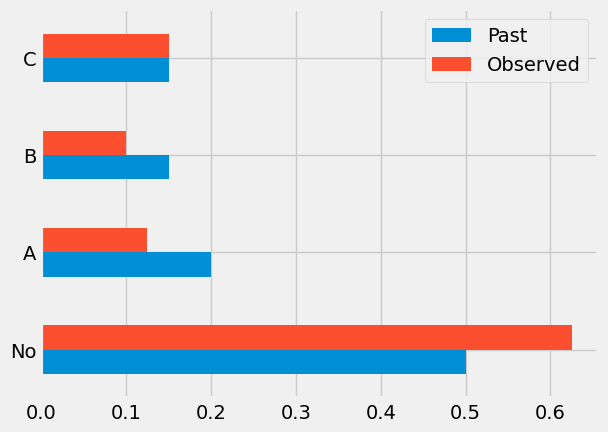

In [5]:
#plot
defects.plot(kind = 'barh').set_yticklabels(defects['Type'])

In [6]:
# Under the model, this is the true distribution of defects
# from which products are randomly sampled
outcomes = ['No','A','B','C']
model = [0.5, 0.2, 0.15, 0.15]

In [7]:
np.random.choice(outcomes, p=model , size = 400)

array(['A', 'C', 'C', 'A', 'No', 'A', 'B', 'A', 'No', 'No', 'B', 'No',
       'No', 'A', 'No', 'B', 'C', 'No', 'No', 'A', 'C', 'No', 'A', 'No',
       'A', 'B', 'C', 'No', 'B', 'No', 'B', 'B', 'No', 'B', 'C', 'No',
       'C', 'C', 'B', 'C', 'No', 'No', 'B', 'No', 'No', 'A', 'No', 'A',
       'No', 'No', 'No', 'No', 'C', 'No', 'No', 'No', 'B', 'A', 'C', 'No',
       'B', 'No', 'C', 'B', 'C', 'B', 'B', 'A', 'No', 'No', 'A', 'C', 'C',
       'No', 'B', 'B', 'No', 'C', 'No', 'A', 'C', 'C', 'No', 'No', 'No',
       'No', 'No', 'C', 'No', 'No', 'A', 'No', 'A', 'B', 'No', 'No', 'B',
       'No', 'No', 'No', 'No', 'No', 'No', 'C', 'A', 'C', 'No', 'C', 'No',
       'A', 'No', 'B', 'No', 'C', 'C', 'C', 'No', 'A', 'No', 'C', 'C',
       'No', 'A', 'B', 'C', 'No', 'A', 'No', 'A', 'No', 'No', 'No', 'B',
       'No', 'A', 'No', 'A', 'No', 'No', 'A', 'No', 'B', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'B', 'B', 'C', 'No', 'No', 'No',
       'No', 'No', 'C', 'No', 'A', 'No', 'No', 'B', 

In [8]:
#let's determine the percentage of each outome from the model distribution
simulated = np.random.choice(outcomes, p=model, size =400)
result=[]
for i in outcomes:
    result.append(sum(simulated==i)/400)

result

[np.float64(0.5175),
 np.float64(0.1725),
 np.float64(0.1775),
 np.float64(0.1325)]

In [9]:
# Let's simulate a random draw of 400 products from the model distribution
def sample():
  simulated = np.random.choice(outcomes, p=model, size =400)
  result=[]
  for i in outcomes:
      result.append(sum(simulated==i)/400)

  return result

In [10]:
sample()

[np.float64(0.5), np.float64(0.19), np.float64(0.1475), np.float64(0.1625)]

In [11]:
# Let's put this into a table
defects_with_simulated = defects.copy()
defects_with_simulated['Simulated'] = sample()
defects_with_simulated

,Type,Past,Observed,Simulated
0,No,0.50,0.625,0.4600
1,A,0.20,0.125,0.2050
2,B,0.15,0.100,0.1475
3,C,0.15,0.150,0.1875


[Text(0, 0, 'No'), Text(0, 1, 'A'), Text(0, 2, 'B'), Text(0, 3, 'C')]

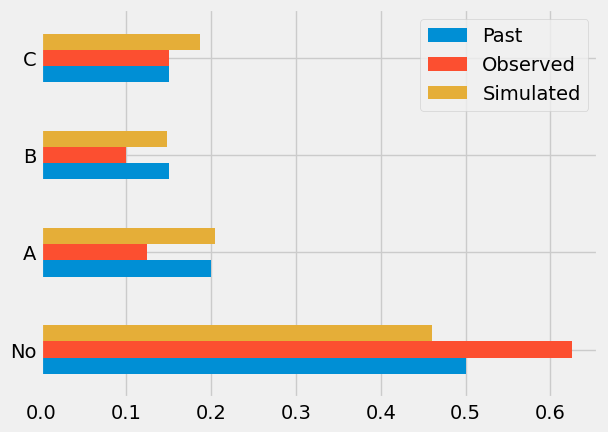

In [12]:
#Let's plot this
defects_with_simulated.plot(kind = 'barh').set_yticklabels(defects['Type'])

## Distance Between Distributions

In [13]:
# We need to understand how each of the 4 categories
# differ from their expected values according to the model.
diffs = defects['Observed'] - defects['Past']
defects_with_difference = defects.copy()
defects_with_difference['Difference'] = diffs
defects_with_difference

,Type,Past,Observed,Difference
0,No,0.50,0.625,0.125
1,A,0.20,0.125,-0.075
2,B,0.15,0.100,-0.050
3,C,0.15,0.150,0.000


## Total Variation Distance

In [14]:
#Let's define total variation distance
def tvd(dist1,dist2):
  return sum(abs(dist1 - dist2))/2

In [15]:
# The TVD of our observed data (observed) from their expected values
# assuming the model is true (past)

obsvd_tvd= tvd(defects['Past'],defects['Observed'])
obsvd_tvd

0.125

In [16]:
# The TVD of a model simluation from its expected values
tvd(sample(),defects['Past'])

0.015000000000000013

In [17]:
#Let's put this into a function
def simulated_tvd():
  return tvd(sample(),defects['Past'])


tvds = []

num_simulation =10000
for i in np.arange(num_simulation):
  tvds.append(simulated_tvd())







In [18]:
tvds

[0.029999999999999985,
 0.02500000000000001,
 0.01749999999999996,
 0.03749999999999999,
 0.06000000000000001,
 0.020000000000000018,
 0.05499999999999999,
 0.022499999999999992,
 0.05000000000000002,
 0.025000000000000022,
 0.017500000000000016,
 0.05499999999999998,
 0.03,
 0.042499999999999996,
 0.03499999999999999,
 0.037500000000000006,
 0.035,
 0.07750000000000003,
 0.012500000000000011,
 0.04000000000000001,
 0.02250000000000002,
 0.055000000000000035,
 0.037500000000000006,
 0.009999999999999995,
 0.07749999999999999,
 0.01749999999999996,
 0.007499999999999979,
 0.027500000000000024,
 0.022500000000000006,
 0.03249999999999999,
 0.03499999999999999,
 0.020000000000000004,
 0.035,
 0.015,
 0.010000000000000009,
 0.04250000000000001,
 0.0325,
 0.05,
 0.019999999999999976,
 0.04500000000000001,
 0.030000000000000013,
 0.034999999999999976,
 0.0625,
 0.022500000000000006,
 0.012499999999999997,
 0.015000000000000013,
 0.05750000000000001,
 0.012499999999999983,
 0.0225000000000000

Observed TVD:0.125


(-500.0, 3500.0)

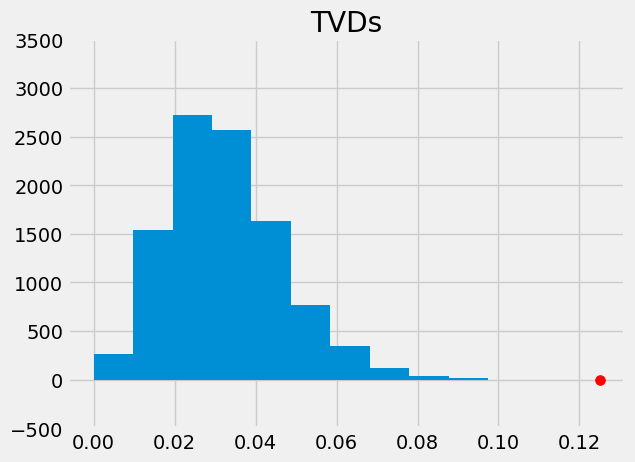

In [19]:
#Let's plot the results
df = pd.DataFrame({'TVDs': tvds}).hist()
print('Observed TVD:' + str(obsvd_tvd))

plots.scatter(obsvd_tvd,0,color='red',s=50)
plots.ylim(-500,3500)